### Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Data Understanding
The following data has been used in this project:

imdb.title.basics  :Gives a general description of the movies; title, start year,run time and the genre.

imdb.title.rating  :Contains data about the average rating of the movie and the number of votes  it received.

bom.movie_gross    :Contains data about the revenue generated by the movies both in the domestic and foreign markets and the                       studios where the movies were produced.

In [238]:
import pandas as pd
import numpy as  np

In [239]:
!ls

README.md
bom.movie_gross.csv
datasets
microsoft_problem.ipynb
title.basics.csv
title.ratings.csv


In [240]:
!pwd

/c/Users/ADMIN/Desktop/microsoft_project


In [241]:
bom = pd.read_csv('bom.movie_gross.csv')
ratings = pd.read_csv('title.ratings.csv')
basics = pd.read_csv('title.basics.csv')

# EXPLORING BOM DATA SET


* Fetching the data set's info,shape, basic statistics of the columns, and a general overview  of the dataset.

In [242]:
#Fetching the first 5 rows
bom.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [243]:
#last 5 rows
bom.tail(5)

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [244]:
#General shape of the data sets
bom.shape

(3387, 5)

In [245]:
#General info about the data set
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [246]:
#Fetching columns
bom.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [247]:
#Changing the foreign_gross column type from object to numeric
bom['foreign_gross'] = pd.to_numeric(bom.foreign_gross , errors = 'coerce')

In [248]:
#Getting the genereal statistical distribution
bom.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.032000e+03,3387.000000
mean,2.874585e+07,7.505704e+07,2013.958075
std,6.698250e+07,1.375294e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.775000e+06,2012.000000
50%,1.400000e+06,1.890000e+07,2014.000000
75%,2.790000e+07,7.505000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


# EXPLORING THE title.basic DATASET

In [249]:
# Fetching the first two rows
basics.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [250]:
#The last 2 rows
basics.tail(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [251]:
#Inquiring the gebneral shape of the dataset
basics.shape

(146144, 6)

In [252]:
#General info about the dataset
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [253]:
#Exploring the genres columns
basics.genres.unique()

array(['Action,Crime,Drama', 'Biography,Drama', 'Drama', ...,
       'Music,Musical,Reality-TV', 'Animation,Crime',
       'Adventure,History,War'], dtype=object)

In [254]:
#Returning the count of genres as in the dataset
basics['genres'].value_counts()

Documentary                      32185
Drama                            21486
Comedy                            9177
Horror                            4372
Comedy,Drama                      3519
                                 ...  
Mystery,Thriller,Western             1
Sport,Thriller                       1
Action,Animation,History             1
Documentary,Horror,Reality-TV        1
Biography,Music,Musical              1
Name: genres, Length: 1085, dtype: int64

In [255]:
#Displaying the 10 most common genres in the dataset
basics['genres'].value_counts()[:10]

Documentary              32185
Drama                    21486
Comedy                    9177
Horror                    4372
Comedy,Drama              3519
Thriller                  3046
Action                    2219
Biography,Documentary     2115
Drama,Romance             2079
Comedy,Drama,Romance      1558
Name: genres, dtype: int64

# EXPLORING THE GENERALOVERVIEW OF THE  ratings DATASET

In [256]:
#Displaying the first 3 rows
ratings.head(3)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [257]:
#Displaying the last 3 rows
ratings.tail(3)

,tconst,averagerating,numvotes
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [258]:
#Displying a sample 10 records of the dataset randomly selected
ratings.sample(10)


,tconst,averagerating,numvotes
30540,tt2379332,6.9,118
41561,tt3106120,4.8,5395
28410,tt4629032,6.7,1031
12190,tt6054710,5.3,231
36956,tt2789438,7.8,6
47198,tt5739468,5.9,30
62967,tt3378000,2.2,113
22450,tt4527664,6.2,221
37114,tt3242110,6.1,34
18547,tt2071458,6.3,192


In [259]:
#Inquiring about the columns
ratings.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [260]:
ratings.shape

(73856, 3)

In [261]:
#Fetching the general info of the dataset
#NOTE: The dataset rows have no empty values
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [262]:
#Getting a statistical overview of the dataset
ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [263]:
#Sorting the dataset with the averagerating
ratings.sort_values('averagerating', ascending = False)

,tconst,averagerating,numvotes
27644,tt8730716,10.0,5
8992,tt1770682,10.0,5
26153,tt2632430,10.0,5
65033,tt9715646,10.0,20
57679,tt5344358,10.0,6
...,...,...,...
50971,tt6017238,1.0,21
32440,tt2087999,1.0,7
36456,tt1896768,1.0,21
54856,tt1976600,1.0,436


In [264]:
#Getting a general overview of the averagerating column
ratings['averagerating'].unique()

array([ 8.3,  8.9,  6.4,  4.2,  6.5,  6.2,  7. ,  7.2,  5.1,  5.8,  8. ,
        5.5,  7.6,  5. ,  7.4,  6.6,  5.4,  4. ,  4.4,  5.6,  6.1,  3.4,
        7.7,  4.5,  6.3,  6.7,  8.4,  7.8,  5.2,  3.6,  2.1,  2.5,  4.6,
        7.5,  5.7,  3.5,  7.1,  8.5,  5.3,  8.2,  3.8,  4.9,  6.9,  8.6,
        7.3,  4.7,  3.2,  2.6,  3.9,  5.9,  8.7,  6.8,  7.9,  2. ,  6. ,
        3.7,  2.4,  3. ,  8.1,  4.8,  2.8,  9.2,  4.3,  2.9,  4.1,  1.4,
        1.9,  8.8,  9.4,  3.3,  9.1,  9.7,  9. ,  2.7,  1. ,  3.1,  1.7,
        2.3,  9.5,  9.3,  2.2,  1.2,  1.1,  9.8,  1.8,  1.5,  9.6,  1.6,
        9.9,  1.3, 10. ])

# MERGING THE DATASETS

In [265]:
#We start by merging the title basics datasets and the ratings dataset
merge_1 = pd.merge(ratings, basics, on='tconst' , how='outer')

In [266]:
#Inspecting the first 20 rows of the merged dataset
merge_1.head(20)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31.0,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559.0,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20.0,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352.0,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21.0,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
5,tt1069246,6.2,326.0,Habana Eva,Habana Eva,2010,106.0,"Comedy,Romance"
6,tt1094666,7.0,1613.0,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport"
7,tt1130982,6.4,571.0,The Night Clerk,Avant l'aube,2011,104.0,"Drama,Thriller"
8,tt1156528,7.2,265.0,Silent Sonata,Circus Fantasticus,2011,77.0,"Drama,War"
9,tt1161457,4.2,148.0,Vanquisher,The Vanquisher,2016,90.0,"Action,Adventure,Sci-Fi"


In [267]:
merge_1.shape

(146144, 8)

In [268]:
#Merging the bom dataset with the merge_1 dataset
final_merge = pd.merge(merge_1 , bom, left_on=('primary_title'), right_on=('title') , how = 'outer')

# PERFORMING EDA FOR THE final_merge datasets

* It is important to do a data exploration of our newly merged dataset. To facilitate a better understanding of our newly formed dataset. This is important before we proceed to the data clean up and data analysis phase.

In [269]:
#Displaying the first 5 rows
final_merge.head(5)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt10356526,8.3,31.0,Laiye Je Yaarian,Laiye Je Yaarian,2019.0,117.0,Romance,NaN,NaN,NaN,NaN,NaN
1,tt10384606,8.9,559.0,Borderless,Borderless,2019.0,87.0,Documentary,NaN,NaN,NaN,NaN,NaN
2,tt4131210,7.1,210.0,Borderless,Bedone marz,2014.0,102.0,"Drama,War",NaN,NaN,NaN,NaN,NaN
3,tt1042974,6.4,20.0,Just Inès,Just Inès,2010.0,90.0,Drama,NaN,NaN,NaN,NaN,NaN
4,tt1043726,4.2,50352.0,The Legend of Hercules,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",The Legend of Hercules,LG/S,18800000.0,42400000.0,2014.0


In [270]:
final_merge.shape

(146927, 13)

In [271]:
#Displaying  all the columns of the final_merge data set
final_merge.columns

Index(['tconst', 'averagerating', 'numvotes', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres', 'title',
       'studio', 'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

In [272]:
final_merge.sample(10)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
113205,tt5045634,NaN,NaN,Bujilan,Bujilan,2015.0,90.0,Drama,NaN,NaN,NaN,NaN,NaN
117021,tt5542534,NaN,NaN,Jo Anne and Bob,Jo Anne and Bob,2016.0,51.0,Documentary,NaN,NaN,NaN,NaN,NaN
63514,tt1844633,4.1,1222.0,Blood Runs Cold,Blood Runs Cold,2011.0,80.0,Horror,NaN,NaN,NaN,NaN,NaN
111141,tt4731002,NaN,NaN,O Meu Raúl,O Meu Raúl,2010.0,53.0,"Biography,Documentary",NaN,NaN,NaN,NaN,NaN
71514,tt7843600,6.8,3628.0,Fyre Fraud,Fyre Fraud,2019.0,96.0,Documentary,NaN,NaN,NaN,NaN,NaN
144558,tt9615484,NaN,NaN,Tra le onde,Tra le onde,2019.0,NaN,Drama,NaN,NaN,NaN,NaN,NaN
19529,tt1687247,7.7,14367.0,Life in a Day,Life in a Day,2011.0,95.0,"Documentary,Drama",Life in a Day,NGE,253000.0,NaN,2011.0
39103,tt3840096,5.7,6.0,Caught Between the Two,Caught Between the Two,2016.0,72.0,Drama,NaN,NaN,NaN,NaN,NaN
67046,tt3293888,8.6,7.0,Just Tom,Just Tom,2013.0,86.0,"Comedy,Drama",NaN,NaN,NaN,NaN,NaN
48711,tt3792330,4.3,800.0,Cherry Tree,Cherry Tree,2015.0,85.0,"Horror,Mystery",NaN,NaN,NaN,NaN,NaN


# DATA PREPARATION
## DATA CLEAN UP

*At this stage, we will perform data clean up. Perform filtering, dropping of rows and columns that we dont need in our analysis, identifying missing values and dealing with them. Performing sorting of the data. Generally, we are preparing our data for analysis.

In [273]:
final_merge.head(100)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt10356526,8.3,31.0,Laiye Je Yaarian,Laiye Je Yaarian,2019.0,117.0,Romance,NaN,NaN,NaN,NaN,NaN
1,tt10384606,8.9,559.0,Borderless,Borderless,2019.0,87.0,Documentary,NaN,NaN,NaN,NaN,NaN
2,tt4131210,7.1,210.0,Borderless,Bedone marz,2014.0,102.0,"Drama,War",NaN,NaN,NaN,NaN,NaN
3,tt1042974,6.4,20.0,Just Inès,Just Inès,2010.0,90.0,Drama,NaN,NaN,NaN,NaN,NaN
4,tt1043726,4.2,50352.0,The Legend of Hercules,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",The Legend of Hercules,LG/S,18800000.0,42400000.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,tt1467290,6.3,173.0,Retornos,Retornos,2010.0,88.0,Thriller,NaN,NaN,NaN,NaN,NaN
96,tt1468387,6.5,2306.0,What If...,What If...,2010.0,111.0,"Drama,Family,Fantasy",NaN,NaN,NaN,NaN,NaN
97,tt2400283,6.9,6924.0,What If...,An...,2012.0,111.0,"Drama,Romance",NaN,NaN,NaN,NaN,NaN
98,tt1474456,3.2,103.0,Lizard Boy,Lizard Boy,2011.0,98.0,"Action,Comedy,Horror",NaN,NaN,NaN,NaN,NaN


In [274]:
#We will start by dropping the columns that we shall not use in our analysis
not_needed_columns = ['original_title', 'title', 'year']
final_merge.drop(columns = not_needed_columns, inplace = True )

In [275]:
#Confirming that the columns have been dropped 
final_merge.columns

Index(['tconst', 'averagerating', 'numvotes', 'primary_title', 'start_year',
       'runtime_minutes', 'genres', 'studio', 'domestic_gross',
       'foreign_gross'],
      dtype='object')

In [276]:
final_merge.head(5)

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,NaN,NaN,NaN
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,NaN,NaN,NaN
2,tt4131210,7.1,210.0,Borderless,2014.0,102.0,"Drama,War",NaN,NaN,NaN
3,tt1042974,6.4,20.0,Just Inès,2010.0,90.0,Drama,NaN,NaN,NaN
4,tt1043726,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000.0


In [277]:
#Detecting the null values
final_merge.isna().sum()

tconst                781
averagerating       73069
numvotes            73069
primary_title         781
start_year            781
runtime_minutes     32520
genres               6189
studio             142785
domestic_gross     142815
foreign_gross      144416
dtype: int64

In [278]:
#Dropping the NAN values for tconst,primary_title and start_year columns
final_merge.dropna(subset=['tconst','primary_title','start_year'], inplace = True)

In [279]:
final_merge.shape

(146146, 10)

In [280]:
final_merge.isna().sum()

tconst                  0
averagerating       72288
numvotes            72288
primary_title           0
start_year              0
runtime_minutes     31739
genres               5408
studio             142783
domestic_gross     142804
foreign_gross      144107
dtype: int64

In [281]:
#Checking for duplicates in the primary_title column
num_duplicates = final_merge[final_merge.duplicated(subset= ['primary_title'])]
num_duplicates

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross
2,tt4131210,7.1,210.0,Borderless,2014.0,102.0,"Drama,War",NaN,NaN,NaN
8,tt3096900,6.5,13.0,The Hammer,2015.0,75.0,"Action,Adventure,Documentary",NaN,NaN,NaN
17,tt9158074,NaN,NaN,Black Widow,2017.0,NaN,Drama,NaN,NaN,NaN
41,tt6135412,3.9,13.0,Going the Distance,2016.0,117.0,NaN,WB (NL),17800000.0,24200000.0
42,tt5127484,NaN,NaN,Going the Distance,2015.0,65.0,Comedy,WB (NL),17800000.0,24200000.0
...,...,...,...,...,...,...,...,...,...,...
144557,tt9616952,NaN,NaN,View from the Past,2019.0,NaN,Sci-Fi,NaN,NaN,NaN
144795,tt9660588,NaN,NaN,3. Elma,2014.0,65.0,Drama,NaN,NaN,NaN
144796,tt9773302,NaN,NaN,3. Elma,2014.0,65.0,Drama,NaN,NaN,NaN
144940,tt9688944,NaN,NaN,Um fio de esperança: independência ou guerra n...,2017.0,94.0,Documentary,NaN,NaN,NaN


In [282]:
#Checking the count of the duplicated data in the primary_title column
final_merge.duplicated(['primary_title']).sum()

10075

*The count of duplicates in the primary_title column is 10075 and contributes to 6.894% of the entire column (146146 entries). We shall drop the duplicates to reduce on the data redundancy and improve on the coinciseness of the data

In [283]:
final_merge.drop_duplicates(subset= 'primary_title', keep="first", inplace=True)

In [284]:
final_merge.shape

(136071, 10)

In [285]:
final_merge.head(10)

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,NaN,NaN,NaN
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,NaN,NaN,NaN
3,tt1042974,6.4,20.0,Just Inès,2010.0,90.0,Drama,NaN,NaN,NaN
4,tt1043726,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000.0
5,tt1060240,6.5,21.0,Até Onde?,2011.0,73.0,"Mystery,Thriller",NaN,NaN,NaN
6,tt1069246,6.2,326.0,Habana Eva,2010.0,106.0,"Comedy,Romance",NaN,NaN,NaN
7,tt1094666,7.0,1613.0,The Hammer,2010.0,108.0,"Biography,Drama,Sport",NaN,NaN,NaN
9,tt1130982,6.4,571.0,The Night Clerk,2011.0,104.0,"Drama,Thriller",NaN,NaN,NaN
10,tt1156528,7.2,265.0,Silent Sonata,2011.0,77.0,"Drama,War",NaN,NaN,NaN
11,tt1161457,4.2,148.0,Vanquisher,2016.0,90.0,"Action,Adventure,Sci-Fi",NaN,NaN,NaN


## Checking for null values in the domestic_gross and foreign_gross

In [286]:
final_merge.foreign_gross.isna().sum()

134511

In [287]:
final_merge.domestic_gross.isna().sum()

133483

In [288]:
#Calculating the median of each column.
median_value_domestic = final_merge['domestic_gross'].median()
median_value_domestic

1900000.0

In [289]:
# Filling the NAN values with the median of each columns
final_merge['domestic_gross'].fillna(median_value_domestic, inplace = True)

In [290]:
median_value_foreign = final_merge['foreign_gross'].median()
median_value_foreign

21900000.0

In [291]:
final_merge['foreign_gross'].fillna(median_value_foreign, inplace = True)

In [292]:
#Inspecting the new dataset after filling the NAN values
final_merge.head(10)

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,NaN,1900000.0,21900000.0
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,NaN,1900000.0,21900000.0
3,tt1042974,6.4,20.0,Just Inès,2010.0,90.0,Drama,NaN,1900000.0,21900000.0
4,tt1043726,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000.0
5,tt1060240,6.5,21.0,Até Onde?,2011.0,73.0,"Mystery,Thriller",NaN,1900000.0,21900000.0
6,tt1069246,6.2,326.0,Habana Eva,2010.0,106.0,"Comedy,Romance",NaN,1900000.0,21900000.0
7,tt1094666,7.0,1613.0,The Hammer,2010.0,108.0,"Biography,Drama,Sport",NaN,1900000.0,21900000.0
9,tt1130982,6.4,571.0,The Night Clerk,2011.0,104.0,"Drama,Thriller",NaN,1900000.0,21900000.0
10,tt1156528,7.2,265.0,Silent Sonata,2011.0,77.0,"Drama,War",NaN,1900000.0,21900000.0
11,tt1161457,4.2,148.0,Vanquisher,2016.0,90.0,"Action,Adventure,Sci-Fi",NaN,1900000.0,21900000.0


In [293]:
final_merge.tail(10)

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross
146136,tt9915872,NaN,NaN,The Last White Witch,2019.0,97.0,"Comedy,Drama,Fantasy",NaN,1900000.0,21900000.0
146137,tt9916132,NaN,NaN,The Mystery of a Buryat Lama,2018.0,94.0,"Biography,Documentary,History",NaN,1900000.0,21900000.0
146138,tt9916186,NaN,NaN,Illenau - die Geschichte einer ehemaligen Heil...,2017.0,84.0,Documentary,NaN,1900000.0,21900000.0
146139,tt9916190,NaN,NaN,Safeguard,2019.0,90.0,"Drama,Thriller",NaN,1900000.0,21900000.0
146140,tt9916428,NaN,NaN,The Secret of China,2019.0,NaN,"Adventure,History,War",NaN,1900000.0,21900000.0
146141,tt9916538,NaN,NaN,Kuambil Lagi Hatiku,2019.0,123.0,Drama,NaN,1900000.0,21900000.0
146142,tt9916622,NaN,NaN,Rodolpho Teóphilo - O Legado de um Pioneiro,2015.0,NaN,Documentary,NaN,1900000.0,21900000.0
146143,tt9916706,NaN,NaN,Dankyavar Danka,2013.0,NaN,Comedy,NaN,1900000.0,21900000.0
146144,tt9916730,NaN,NaN,6 Gunn,2017.0,116.0,NaN,NaN,1900000.0,21900000.0
146145,tt9916754,NaN,NaN,Chico Albuquerque - Revelações,2013.0,NaN,Documentary,NaN,1900000.0,21900000.0


In [294]:
final_merge.describe()

,averagerating,numvotes,start_year,runtime_minutes,domestic_gross,foreign_gross
count,69993.000000,6.999300e+04,136071.000000,106892.000000,1.360710e+05,1.360710e+05
mean,6.340581,3.482558e+03,2014.596497,86.357697,2.451679e+06,2.257702e+07
std,1.481208,3.046111e+04,2.719598,171.873281,1.014702e+07,1.642306e+07
min,1.000000,5.000000e+00,2010.000000,1.000000,1.000000e+02,6.000000e+02
25%,5.500000,1.400000e+01,2012.000000,70.000000,1.900000e+06,2.190000e+07
50%,6.500000,4.800000e+01,2015.000000,87.000000,1.900000e+06,2.190000e+07
75%,7.400000,2.720000e+02,2017.000000,99.000000,1.900000e+06,2.190000e+07
max,10.000000,1.841066e+06,2027.000000,51420.000000,7.001000e+08,9.464000e+08


# DATA ANALYSIS
*in this section, we shall perform data analysis of the cleaned data. This is to further inspect aspects and attributes of the data in order to come up with a comprehensive conclusion and recommendations.

In [295]:
#We start by analyzing most popular and profitable genres
# Create a new column 'Total_gross', a total of domestic and foreign gross.

#final_merge['Total_gross'] = final_merge['domestic_gross'] + final_merge['foreign_gross'] 
final_merge['Total_gross'] = final_merge.apply(lambda movie: movie['domestic_gross'] + movie['foreign_gross'] , axis=1)

In [296]:
final_merge.head(10)

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,Total_gross
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,NaN,1900000.0,21900000.0,23800000.0
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,NaN,1900000.0,21900000.0,23800000.0
3,tt1042974,6.4,20.0,Just Inès,2010.0,90.0,Drama,NaN,1900000.0,21900000.0,23800000.0
4,tt1043726,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000.0,61200000.0
5,tt1060240,6.5,21.0,Até Onde?,2011.0,73.0,"Mystery,Thriller",NaN,1900000.0,21900000.0,23800000.0
6,tt1069246,6.2,326.0,Habana Eva,2010.0,106.0,"Comedy,Romance",NaN,1900000.0,21900000.0,23800000.0
7,tt1094666,7.0,1613.0,The Hammer,2010.0,108.0,"Biography,Drama,Sport",NaN,1900000.0,21900000.0,23800000.0
9,tt1130982,6.4,571.0,The Night Clerk,2011.0,104.0,"Drama,Thriller",NaN,1900000.0,21900000.0,23800000.0
10,tt1156528,7.2,265.0,Silent Sonata,2011.0,77.0,"Drama,War",NaN,1900000.0,21900000.0,23800000.0
11,tt1161457,4.2,148.0,Vanquisher,2016.0,90.0,"Action,Adventure,Sci-Fi",NaN,1900000.0,21900000.0,23800000.0


In [297]:
final_merge.sort_values('Total_gross', ascending=False).head(10)

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,Total_gross
72112,tt2395427,7.3,665594.0,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",BV,459000000.0,946400000.0,1.405400e+09
11010,tt1825683,7.3,516148.0,Black Panther,2018.0,134.0,"Action,Adventure,Sci-Fi",BV,700100000.0,646900000.0,1.347000e+09
6343,tt2527336,7.1,462903.0,Star Wars: The Last Jedi,2017.0,152.0,"Action,Adventure,Fantasy",BV,620200000.0,712400000.0,1.332600e+09
10009,tt4881806,6.2,219125.0,Jurassic World: Fallen Kingdom,2018.0,128.0,"Action,Adventure,Sci-Fi",Uni.,417700000.0,891800000.0,1.309500e+09
20675,tt1323045,6.2,62311.0,Frozen,2010.0,93.0,"Adventure,Drama,Sport",BV,400700000.0,875700000.0,1.276400e+09
54155,tt3606756,7.7,203510.0,Incredibles 2,2018.0,118.0,"Action,Adventure,Animation",BV,608600000.0,634200000.0,1.242800e+09
29378,tt1300854,7.2,692794.0,Iron Man 3,2013.0,130.0,"Action,Adventure,Sci-Fi",BV,409000000.0,805800000.0,1.214800e+09
46634,tt2293640,6.4,193917.0,Minions,2015.0,91.0,"Adventure,Animation,Comedy",Uni.,336000000.0,823400000.0,1.159400e+09
68433,tt3498820,7.8,583507.0,Captain America: Civil War,2016.0,147.0,"Action,Adventure,Sci-Fi",BV,408100000.0,745200000.0,1.153300e+09
58086,tt1477834,7.1,263328.0,Aquaman,2018.0,143.0,"Action,Adventure,Fantasy",WB,335100000.0,812700000.0,1.147800e+09


### Clearly, from  the  above  analysis, the Action, Adventure , Sci-Fi genre has the most revenue generation in the box office movies. A genre Microsoft studio offices could venture into.

In [298]:
#We could also check the movies with the highest rating and analyze them
high_rating = final_merge[final_merge['averagerating'] > 8.5]
high_rating

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,Total_gross
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,NaN,1900000.0,21900000.0,23800000.0
89,tt1450750,8.6,27.0,My Father from Haifa,2010.0,NaN,Documentary,NaN,1900000.0,21900000.0,23800000.0
120,tt1517605,8.7,23.0,Astralis - Institution,2010.0,81.0,"Biography,Comedy,Documentary",NaN,1900000.0,21900000.0,23800000.0
220,tt1651906,9.2,9.0,Mzungu (n.) White-Wanderer,2010.0,80.0,"Adventure,Documentary,Drama",NaN,1900000.0,21900000.0,23800000.0
317,tt1740117,8.7,60.0,Toryboy the Movie,2010.0,90.0,"Biography,Documentary,News",NaN,1900000.0,21900000.0,23800000.0
...,...,...,...,...,...,...,...,...,...,...,...
78818,tt9035872,9.0,10.0,Just One More Kiss,2019.0,100.0,"Drama,Romance",NaN,1900000.0,21900000.0,23800000.0
78828,tt9127488,9.3,10.0,Postal,2019.0,77.0,Comedy,NaN,1900000.0,21900000.0,23800000.0
78836,tt9219848,8.7,18.0,Elon Musk: The Real Life Iron Man,2018.0,71.0,"Biography,Documentary",NaN,1900000.0,21900000.0,23800000.0
78851,tt9590776,9.2,37.0,Delta Zoo,2019.0,NaN,Documentary,NaN,1900000.0,21900000.0,23800000.0


In [299]:
filtered_movies = final_merge.loc[(final_merge['averagerating']>8) & (final_merge['Total_gross']> 60000000)]
filtered_movies

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,Total_gross
413,tt10075374,8.3,6.0,The Little Prince,2019.0,93.0,Action,EOne,1300000.0,96200000.0,9.750000e+07
2732,tt8851190,8.1,26.0,Red,2018.0,90.0,Drama,Sum.,90400000.0,108600000.0,1.990000e+08
3989,tt1130884,8.1,1005960.0,Shutter Island,2010.0,138.0,"Mystery,Thriller",Par.,128000000.0,166800000.0,2.948000e+08
4046,tt1392190,8.1,780910.0,Mad Max: Fury Road,2015.0,120.0,"Action,Adventure,Sci-Fi",WB,153600000.0,224800000.0,3.784000e+08
4064,tt1454029,8.1,392699.0,The Help,2011.0,146.0,Drama,BV,169700000.0,46900000.0,2.166000e+08
5109,tt1605776,8.3,7.0,The Visit,2010.0,90.0,"Comedy,Drama,Romance",Uni.,65200000.0,33200000.0,9.840000e+07
8759,tt6966692,8.3,204972.0,Green Book,2018.0,130.0,"Biography,Comedy,Drama",Uni.,85100000.0,234700000.0,3.198000e+08
10649,tt1345836,8.4,1387769.0,The Dark Knight Rises,2012.0,164.0,"Action,Thriller",WB,448100000.0,636800000.0,1.084900e+09
15864,tt3741834,8.1,181601.0,Lion,2016.0,118.0,"Biography,Drama",Wein.,51700000.0,88600000.0,1.403000e+08
16259,tt0892769,8.1,611299.0,How to Train Your Dragon,2010.0,98.0,"Action,Adventure,Animation",P/DW,217600000.0,277300000.0,4.949000e+08


In [300]:
#Groupimg  the highly rated movies with high revenues generated.
grouped = filtered_movies.groupby(['genres','averagerating'])
grouped.sum().sort_values(by='numvotes', ascending=False)

,,numvotes,start_year,runtime_minutes,domestic_gross,foreign_gross,Total_gross
genres,averagerating,,,,,,
"Action,Adventure,Sci-Fi",8.8,1841066.0,2010.0,148.0,292600000.0,535700000.0,8.283000e+08
"Action,Thriller",8.4,1387769.0,2012.0,164.0,448100000.0,636800000.0,1.084900e+09
"Adventure,Drama,Sci-Fi",8.6,1299334.0,2014.0,169.0,188000000.0,489400000.0,6.774000e+08
"Drama,Western",8.4,1211405.0,2012.0,165.0,162800000.0,262600000.0,4.254000e+08
"Biography,Crime,Drama",8.2,1035358.0,2013.0,180.0,116900000.0,275100000.0,3.920000e+08
"Mystery,Thriller",8.1,1005960.0,2010.0,138.0,128000000.0,166800000.0,2.948000e+08
"Action,Adventure,Comedy",8.1,948394.0,2014.0,121.0,333200000.0,440200000.0,7.734000e+08
"Biography,Drama,History",8.1,944205.0,4029.0,273.0,123900000.0,239200000.0,3.631000e+08
"Action,Adventure,Sci-Fi",8.1,780910.0,2015.0,120.0,153600000.0,224800000.0,3.784000e+08


#### Based on the above analysis the top 5 genres that are highly preferred by most viewers  are:
### 1. Action,Adventure,Sci-Fi
### 2. Action,Thriller
### 3. Adventure,Drama,Sci-Fi
### 4.Drama,Western
### 5. Biography,Crime,Drama

In [301]:
# Next, we analyze the studios that Microsoft would emulate or collaborate with in production in order to produce successful movies.

In [302]:
high_rating[['studio','Total_gross']].sort_values(by='Total_gross', ascending = False).head(10)

,studio,Total_gross
68930,WB,828300000.0
29304,Par.,677400000.0
64229,BV,177600000.0
54804,NaN,23800000.0
54518,NaN,23800000.0
54529,NaN,23800000.0
54594,NaN,23800000.0
54609,NaN,23800000.0
54646,NaN,23800000.0
54656,NaN,23800000.0


In [303]:
# Finding the most common studio whose movies rating is above 8.0
studio=filtered_movies['studio'].value_counts()
studio.idxmax()


'BV'

*The most common studio , producing movies with a rating above 8.0 is BV

# DATA VISUALIZATION

#### In this section, we shall further inspect and explore our data using visualizations. 

In [304]:
#importing the necessary libraries:
from  matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline


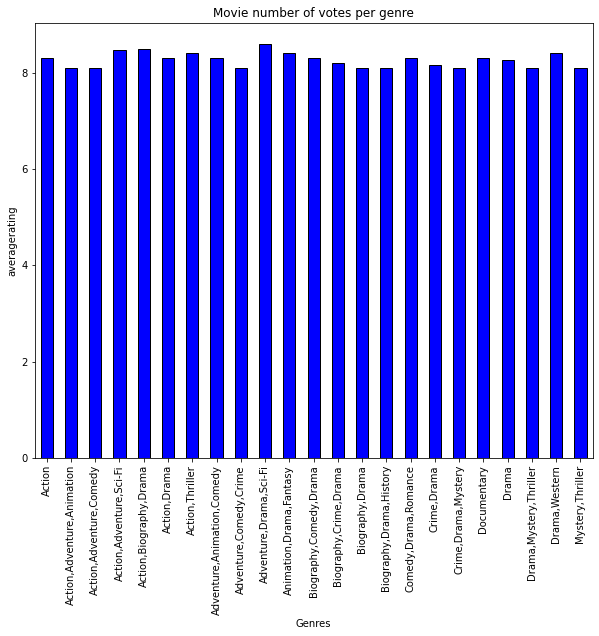

In [305]:
genre_votes = filtered_movies[['genres','averagerating']]
genre_votes_plot =genre_votes.groupby('genres')['averagerating'].mean()
#top_20_genres = genre_votes.nlargest(20, 'averagerating')

plt.figure(figsize=(10,8))
genre_votes_plot.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Genres')
plt.ylabel('averagerating')
plt.title('Movie number of votes per genre')
plt.show()

C:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show(close=None, block=None)>

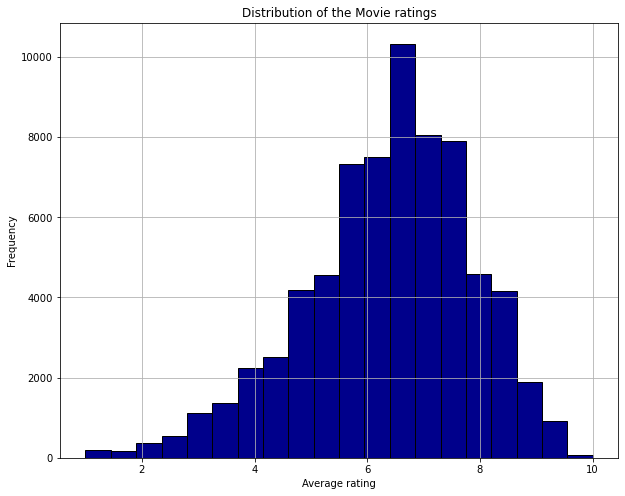

In [306]:
#Next, we plot a histogram to show the distribution of movie ratings
ratings_distribution=final_merge['averagerating']

plt.figure(figsize=(10, 8))
plt.hist(ratings_distribution, bins=20, color='darkblue', edgecolor='black')
plt.title('Distribution of the Movie ratings')
plt.xlabel('Average rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show







#### The above histogram shows a normal distribution of movie ratings. Most ratings are centered around 7.

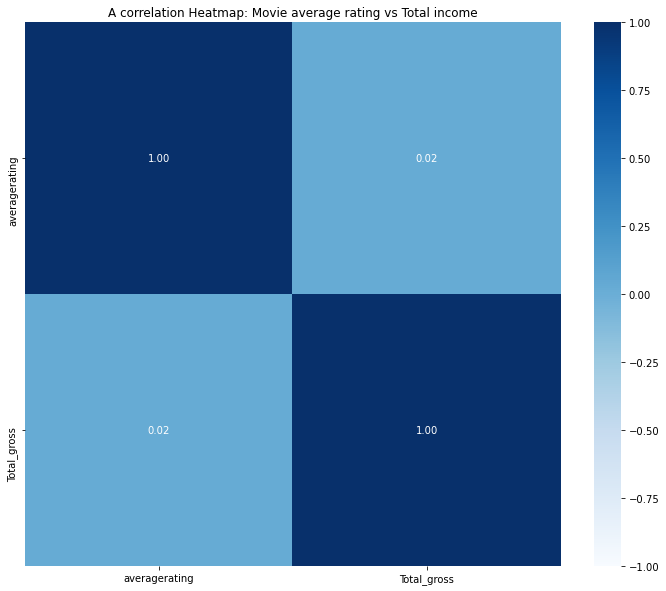

In [307]:
#Plotting a heatmap to evaluate the correlation between movie ratings and the total gross income in the final_merge dataset
rate_gross=final_merge[['averagerating','Total_gross']]
matrix=rate_gross.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(matrix, annot=True, cmap= 'Blues', vmin=-1, vmax=1, fmt='.2f')
plt.title("A correlation Heatmap: Movie average rating vs Total income")
plt.show()

##### *The above heatmap shows that there is little to no correlation between the average rating and the total gross income of the movie.

<function matplotlib.pyplot.show(close=None, block=None)>

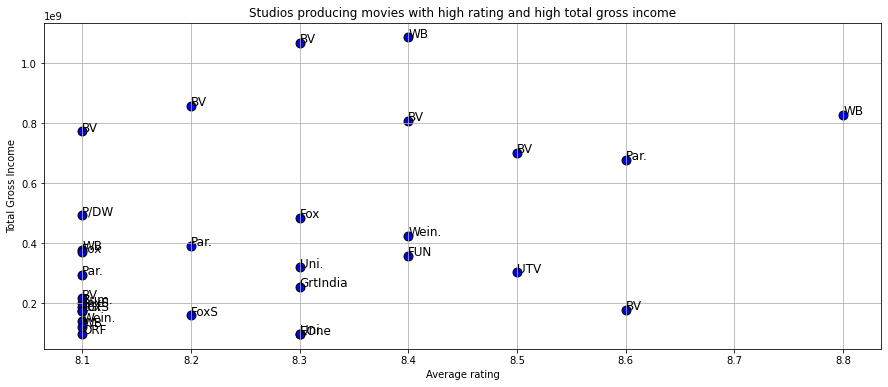

In [308]:
# Plotting a scatterplot to show movies with the highest ratings and highest gross income using the filtered_mob dataset

#top_studios_by_rating = filtered_movies.nlargest(20, 'averagerating')
#top_studios_by_gross = filtered_movies.nlargest(20, 'gross')

plt.figure(figsize=(15, 6))
plt.scatter(filtered_movies['averagerating'], filtered_movies['Total_gross'],s=80, c='blue', edgecolors='black')
plt.title('Studios producing movies with high rating and high total gross income')
plt.xlabel('Average rating')
plt.ylabel('Total Gross Income')
plt.grid(True)


for i, studio in enumerate(filtered_movies['studio']):
    plt.annotate(studio, (filtered_movies['averagerating'].iloc[i],filtered_movies['Total_gross'].iloc[i]), fontsize= 12)
    
plt.show


# CONCLUSIONS
### From the above analysis, we have the following insights:
#### 1.From the data analysis conducted, the Action, Adventure , Sci-Fi genre has the most revenue generation in the box office movies.
#### 2.Based on the above analysis the top 5 genres that are highly preferred by most viewers are:
1. Action,Adventure,Sci-Fi
2. Action,Thriller
3. Adventure,Drama,Sci-Fi
4. Drama,Western
5. Biography,Crime,Drama
#### 3.The studio that produces the most profitable and popular movies is BV



# RECOMMENDATIONS
## 1.Strategic investment: 
*Based on the analysis above,  the Action, Adventure , Sci-Fi genre would be a great investment for producers RO to focus on in production since it has both high social acclaims and high revenue generation.
## 2.Production 
*To enhance user engagements and attract more viewers,producers could could curate content around the top 5  most preferred genres.These are:
Action,Adventure,Sci-Fi
Action,Thriller
Adventure,Drama,Sci-Fi
Drama,Western
Biography,Crime,Drama
*It is however important to diversify content and have a target audience for other genres in order to offer an inclusive entertainment field and spread the risk of production.
## 3.Collaboration/ Benchmarking opportunity
From the analysis, BV studio has produced the most popular,successful and profitable movies. Microsoft  could borrow insights and even collaborate with the studio to gain audience  exposure and presumably grow its revenue.

### NOTE:
While the above recommendations could be adapted, a continuous market analysis is paramount since trends and preferrences may change with time. Additionally, production of original and good quality movies is a key consideration in the production journey. This will enhance viewer retention and recommedations.